# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [651]:
# Import essential libraries for data manipulation and analysis
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split


# For handling warnings
import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [499]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [504]:
# Converting 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Checking inspecting data types
df[['created_at', 'actual_delivery_time']].dtypes

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [507]:
# Convert categorical features to category type

df[ ['market_id', 'store_primary_category', 'order_protocol']].dtypes

market_id                 float64
store_primary_category      int64
order_protocol            float64
dtype: object

In [509]:
# Converting categorical columns to category datatype
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

# checking the updated datatypes
df[['market_id', 'store_primary_category', 'order_protocol']].dtypes

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [513]:
# Calculate time taken in minutes

df['delivery_total_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['delivery_total_time'].head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_total_time, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [516]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day'].apply(lambda x: 1 if x >= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype('category')
df[['order_day', 'isWeekend']].head(10)


order_day isWeekend
0          4         0
1          1         0
2          0         0
3          3         0
4          1         0
5          4         0
6          6         1
7          5         1
8          5         1
9          5         1

In [518]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

# Verify the columns dropped
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  \
0                14.0                      21.0     34.44   
1                 2.0                       2.0     27.60   
2                 6.0                      18.0     11.56   
3                 6.0                       8.0     31.80   
4                 5.0                       7.0      8.20   

   delivery_total_time  order_hour  order_day isWeekend  
0                 47.0          22          4         0  
1                 44.0          21          1         0  
2                 55.0           0          0         0  
3                 59.0           3          3         0  
4                 46.0           2          1         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [522]:
# Define target variable (y) and features (X)

y = df['delivery_total_time']
X = df.drop('delivery_total_time', axis=1)

# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (175777, 15)
Shape of y: (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [525]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verifying the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (140621, 15)
X_test shape: (35156, 15)
y_train shape: (140621,)
y_test shape: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [529]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

# Display defined columns clearly
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [532]:
sns.set_theme(style="darkgrid", palette="colorblind")

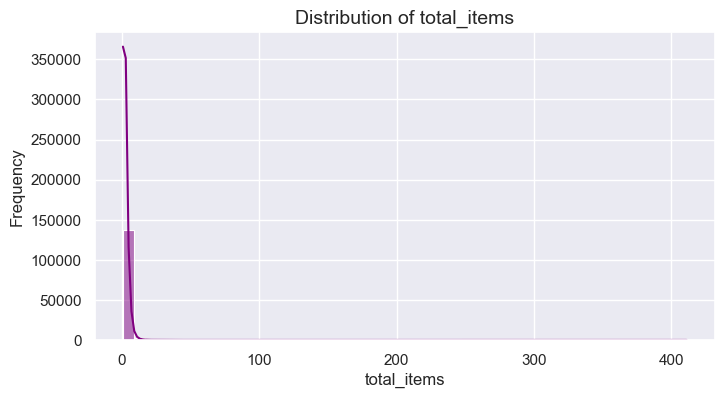

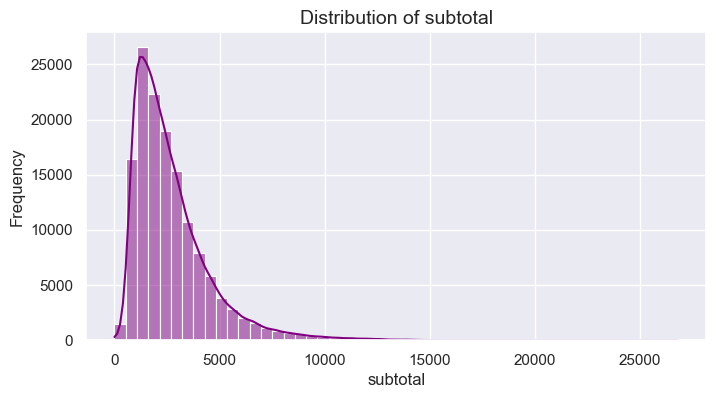

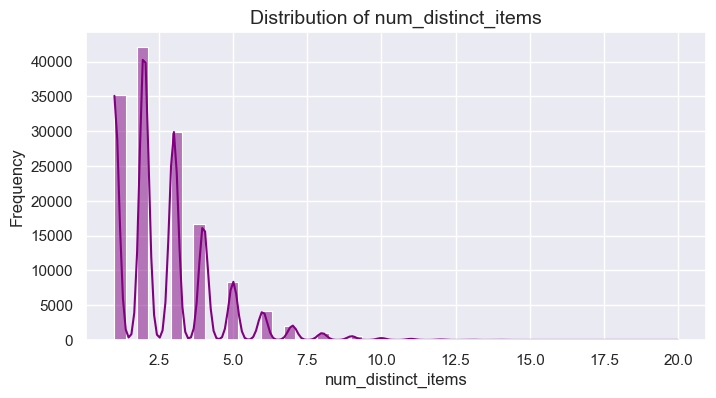

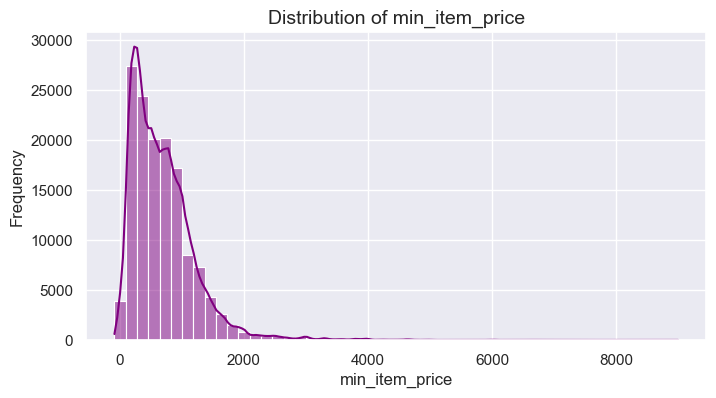

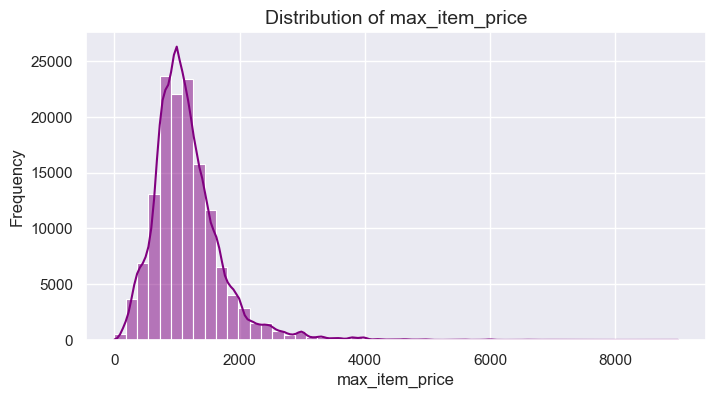

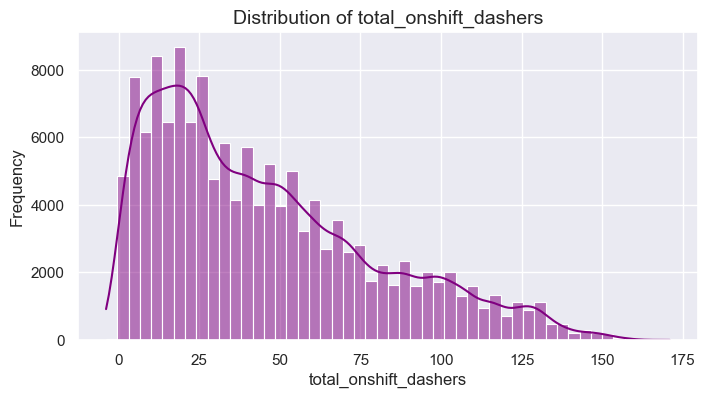

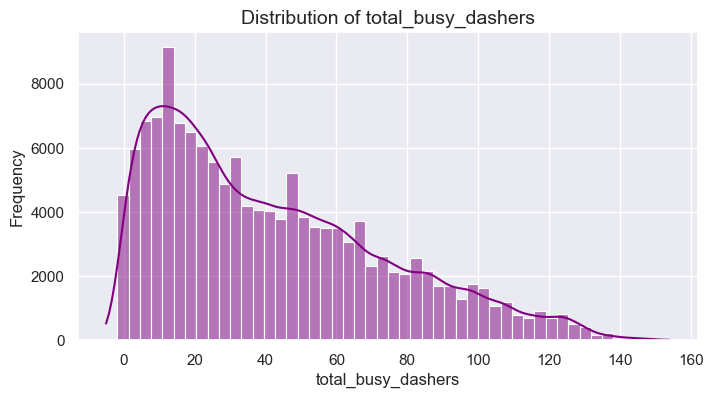

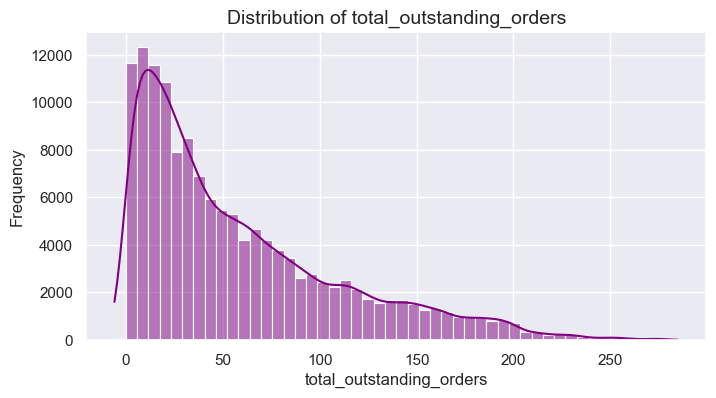

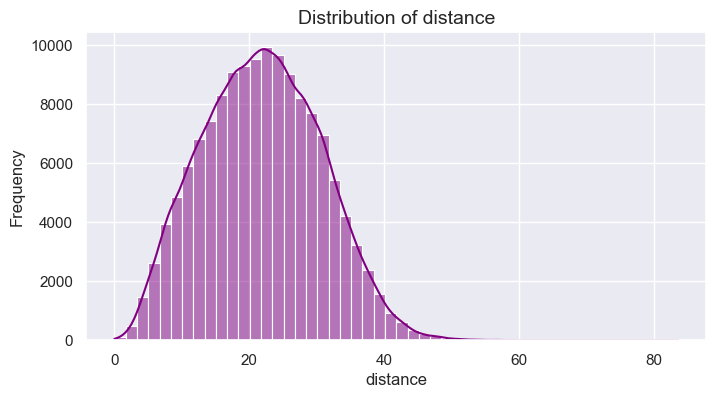

In [534]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], kde=True, bins=50, color='purple')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

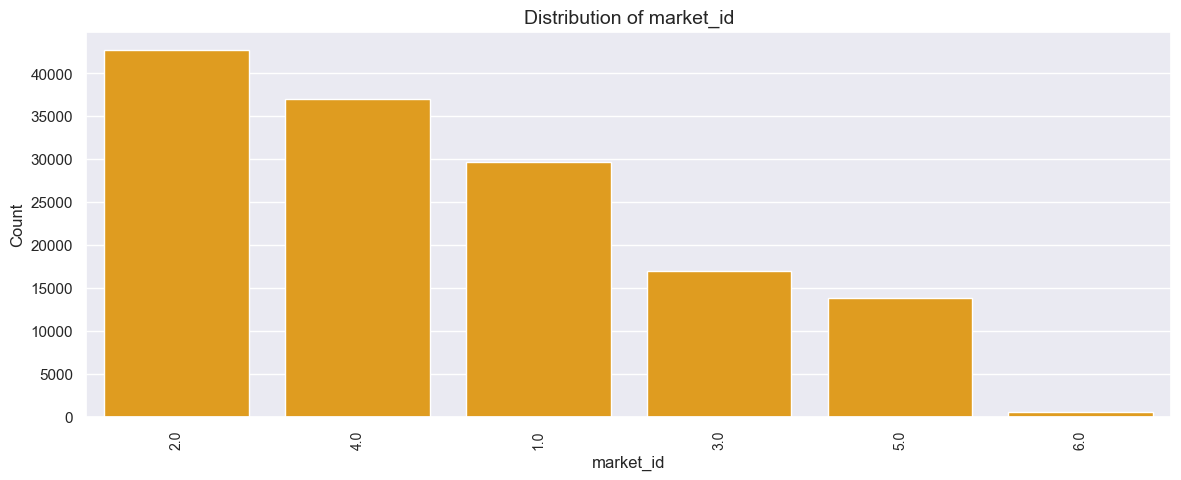

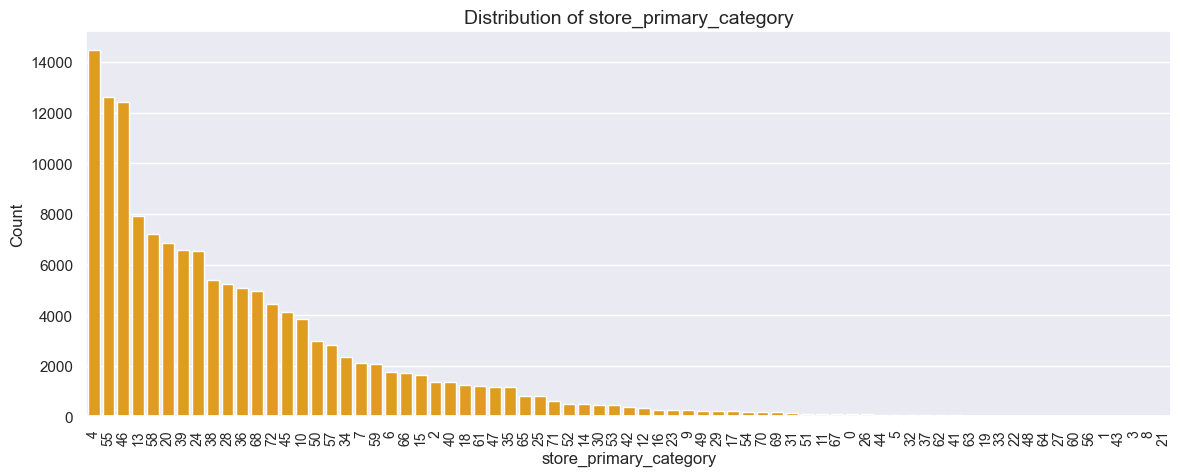

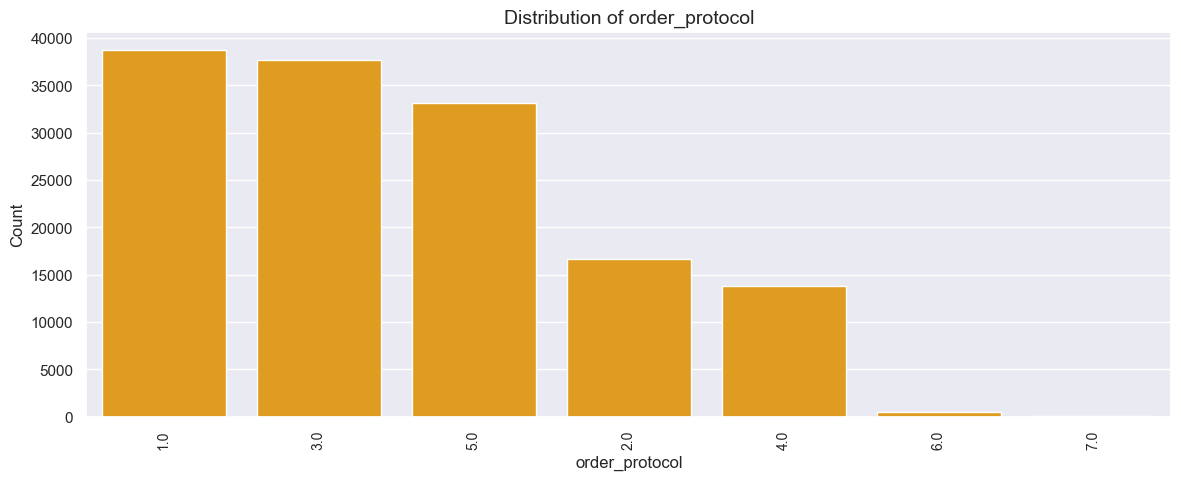

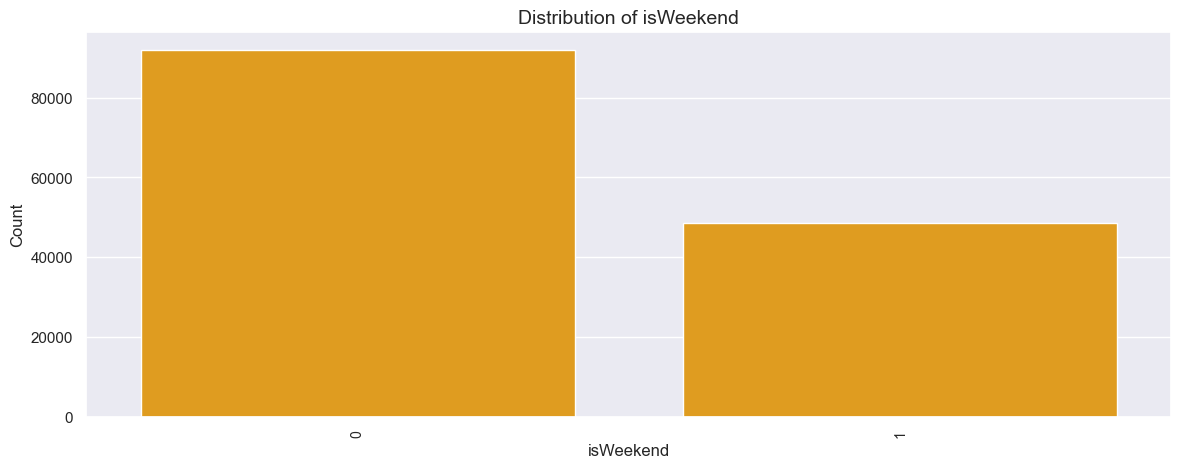

In [536]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(14, 5))
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index, color='orange')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

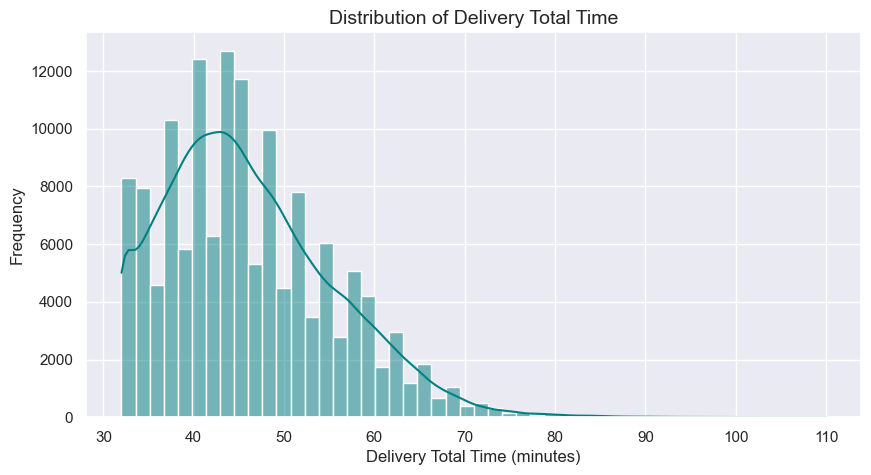

In [539]:
# Distribution of time_taken

plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, bins=50, color='teal')
plt.title('Distribution of Delivery Total Time', fontsize=14)
plt.xlabel('Delivery Total Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

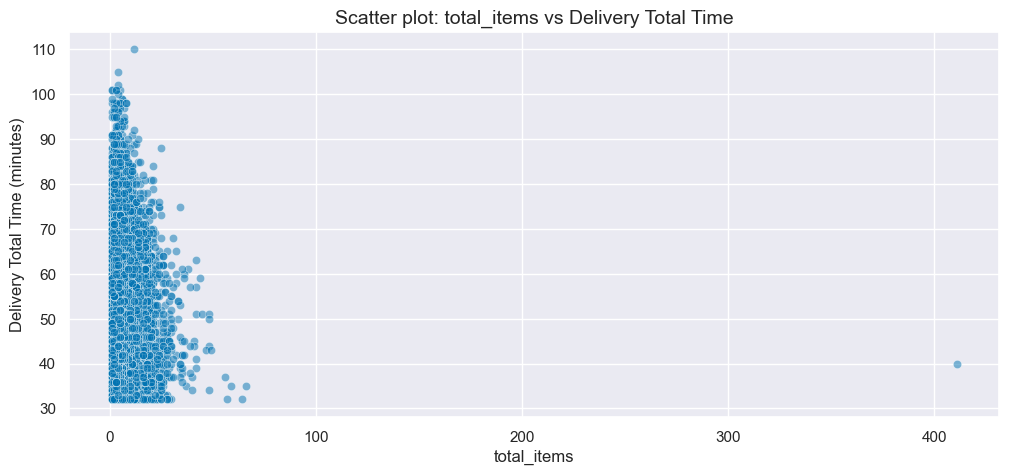

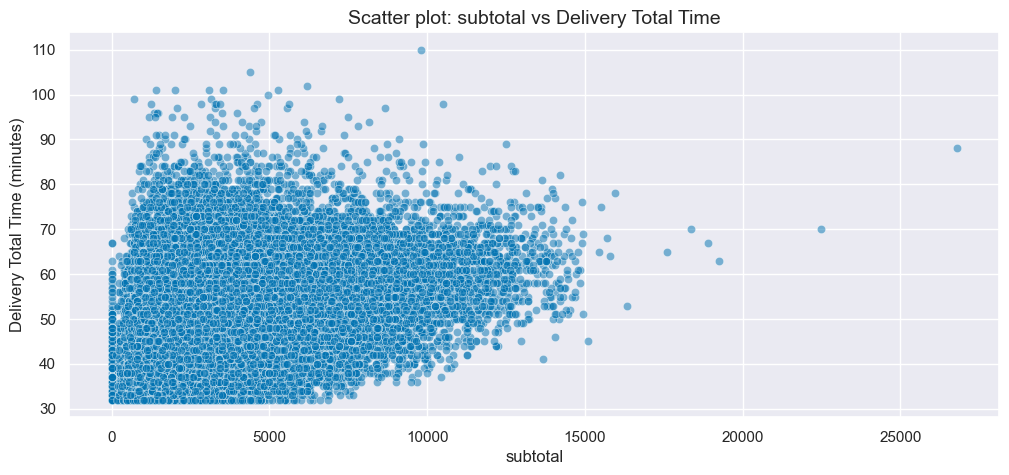

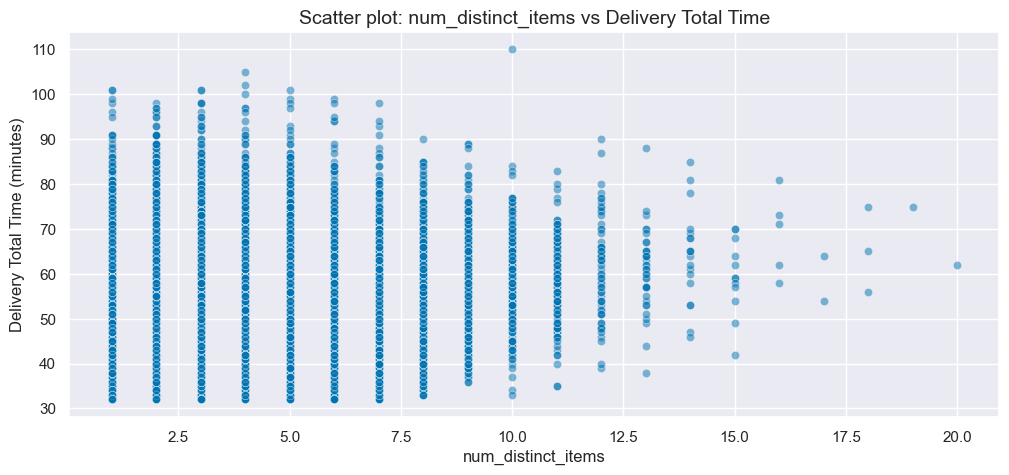

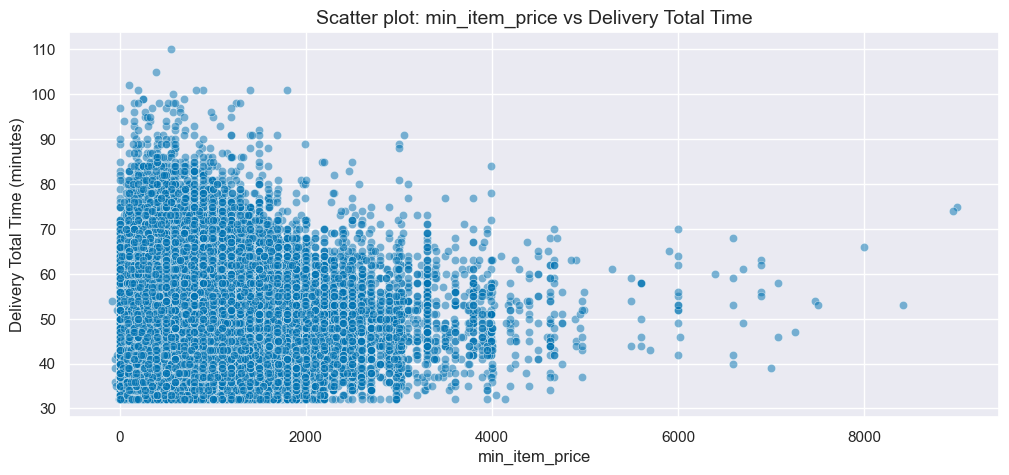

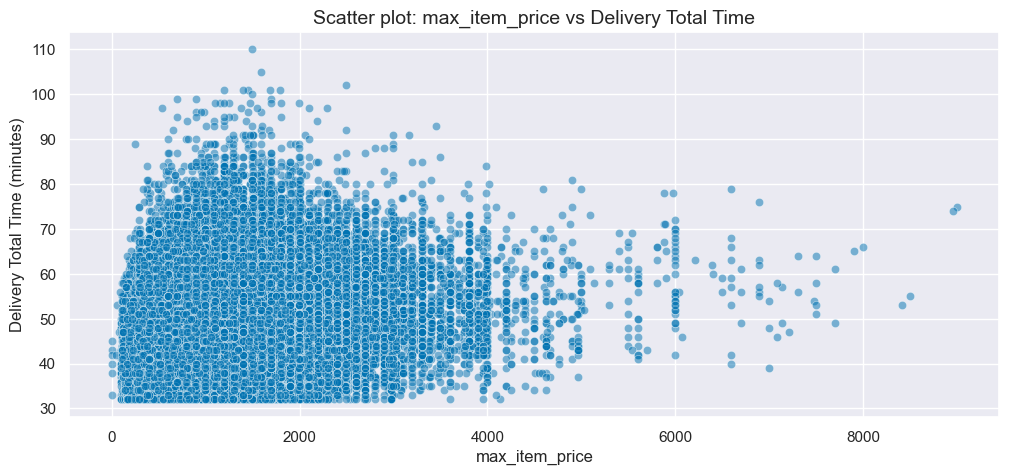

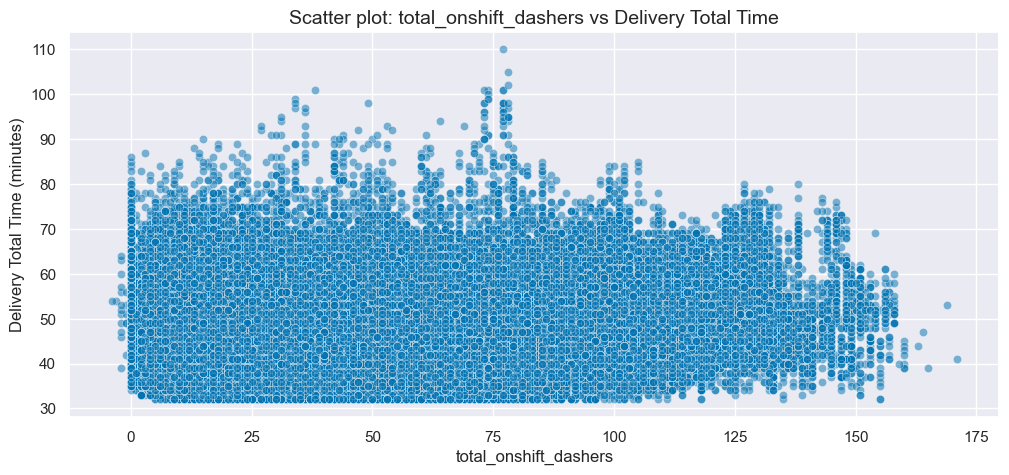

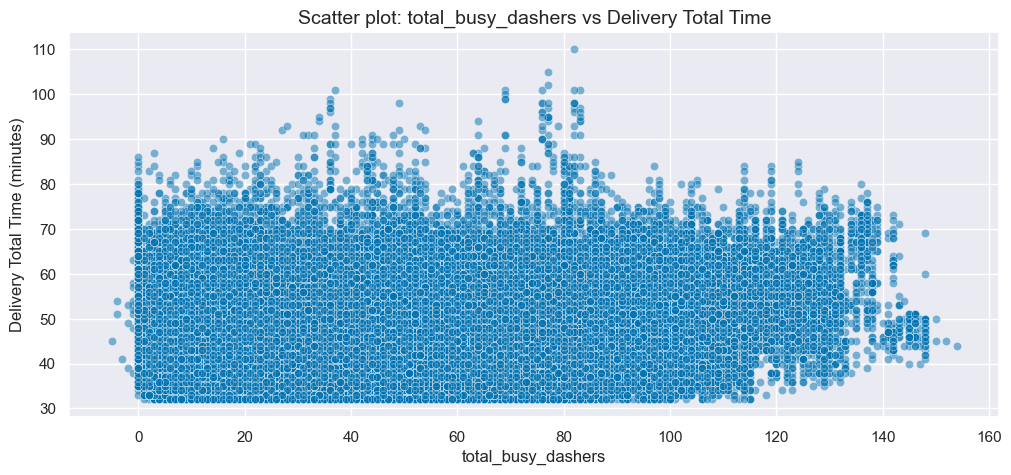

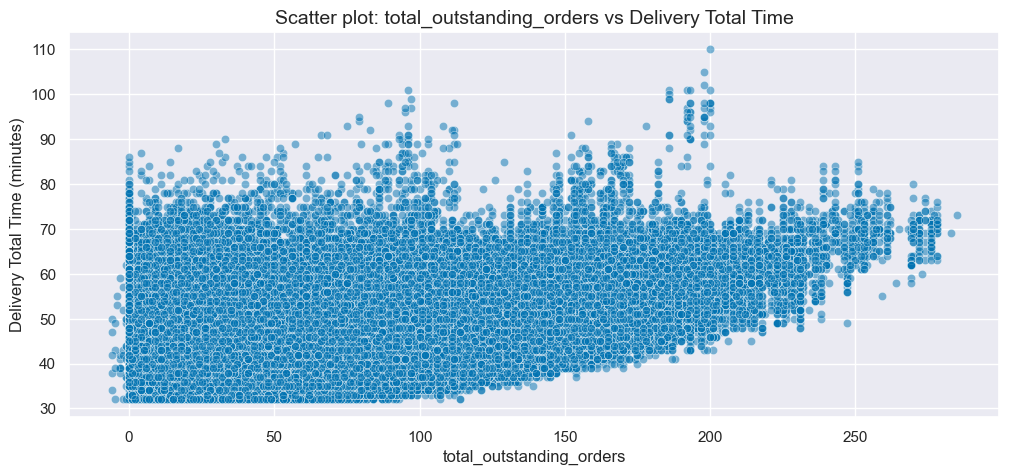

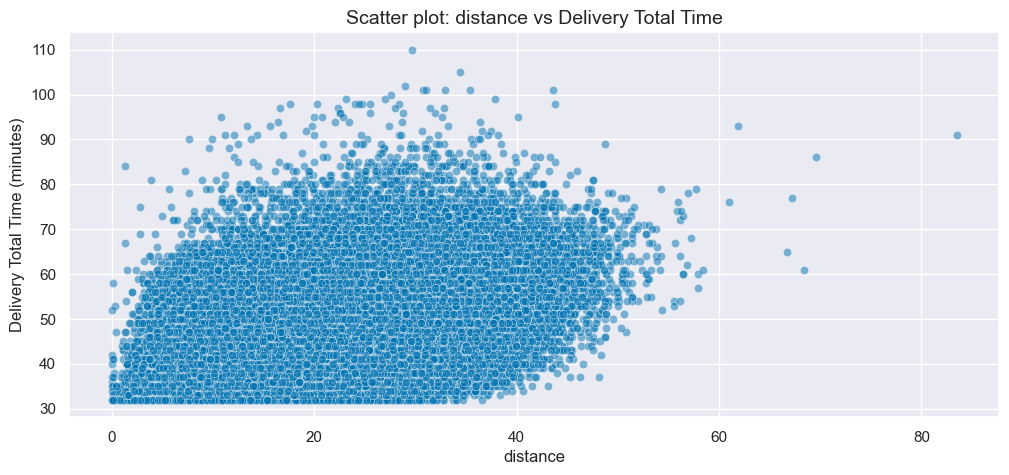

In [543]:
# Scatter plot to visualise the relationship between time_taken and other features

# Combining the numerical columns with the target for scatter plots

train_numerical = X_train[numerical_cols].copy()
train_numerical['delivery_total_time'] = y_train

for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    sns.scatterplot(x=col, y='delivery_total_time', data=train_numerical, alpha=0.5)
    plt.title(f'Scatter plot: {col} vs Delivery Total Time', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Delivery Total Time (minutes)', fontsize=12)
    plt.show()


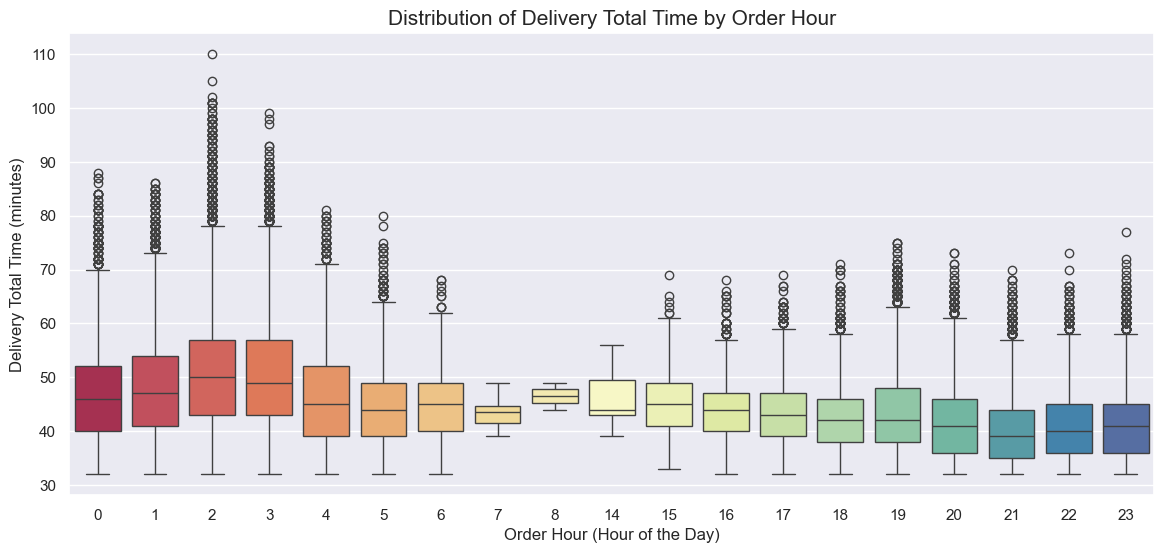

In [545]:
# Show the distribution of time_taken for different hours

# Combining 'order_hour' with the target variable
train_hourly = X_train[['order_hour']].copy()
train_hourly['delivery_total_time'] = y_train

plt.figure(figsize=(14, 6))
sns.boxplot(x='order_hour', y='delivery_total_time', data=train_hourly, palette='Spectral')
plt.title('Distribution of Delivery Total Time by Order Hour', fontsize=15)
plt.xlabel('Order Hour (Hour of the Day)', fontsize=12)
plt.ylabel('Delivery Total Time (minutes)', fontsize=12)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

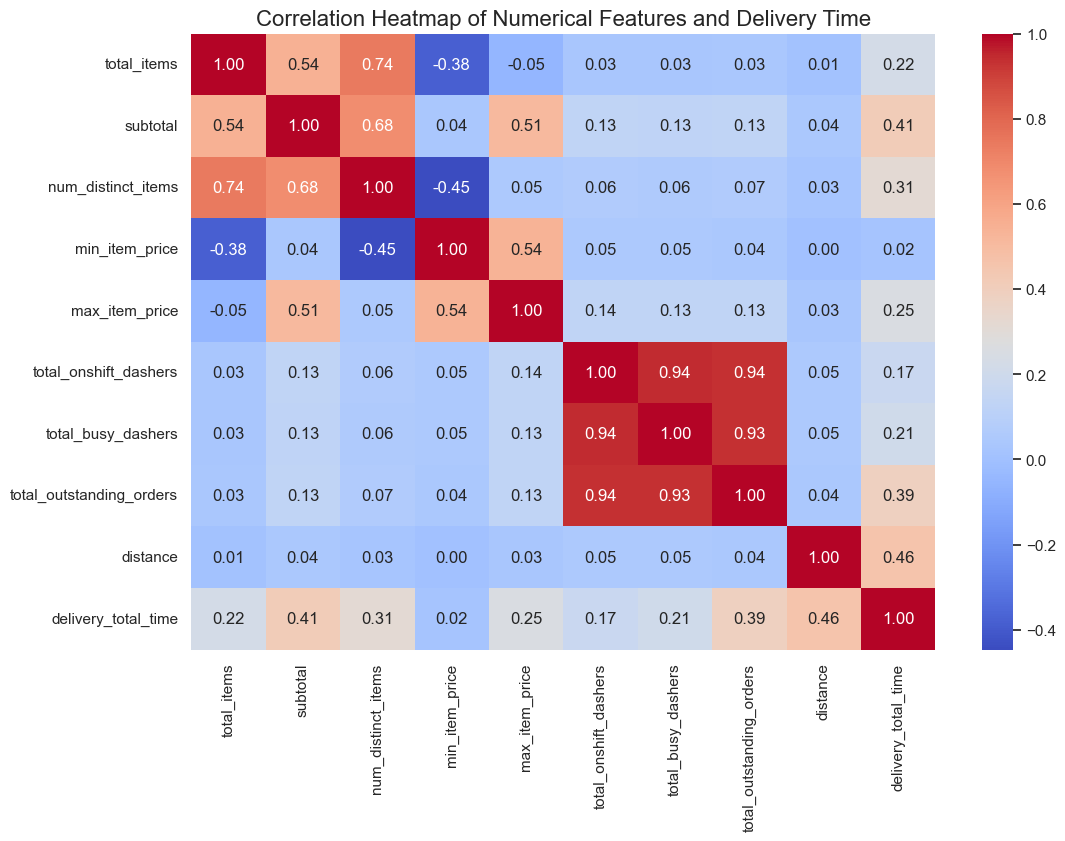

In [549]:
# Plot the heatmap of the correlation matrix

corr_matrix = train_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Delivery Time', fontsize=16)
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [552]:
# Drop 3-5 weakly correlated columns from training dataset

# Correlation values in ascending sort order
correlations = train_numerical.corr()['delivery_total_time'].abs().sort_values()

# Display lowest correlated columns
print("Features with lowest correlations:\n", correlations.head(5))

Features with lowest correlations:
 min_item_price           0.021151
total_onshift_dashers    0.171828
total_busy_dashers       0.206514
total_items              0.220804
max_item_price           0.254650
Name: delivery_total_time, dtype: float64


In [554]:
# Top 3 weakly related columns
weak_cols_to_drop = correlations.head(3).index.tolist()
print("Columns to be dropped:", weak_cols_to_drop)

# Dropping weakly correlated columns from X_train and X_test
X_train.drop(columns=weak_cols_to_drop, axis=1, inplace=True)
X_test.drop(columns=weak_cols_to_drop, axis=1, inplace=True)

# Remaining Columns
print("Remaining columns:", X_train.columns.tolist())

Columns to be dropped: ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers']
Remaining columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [558]:
y_train.describe()

count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: delivery_total_time, dtype: float64

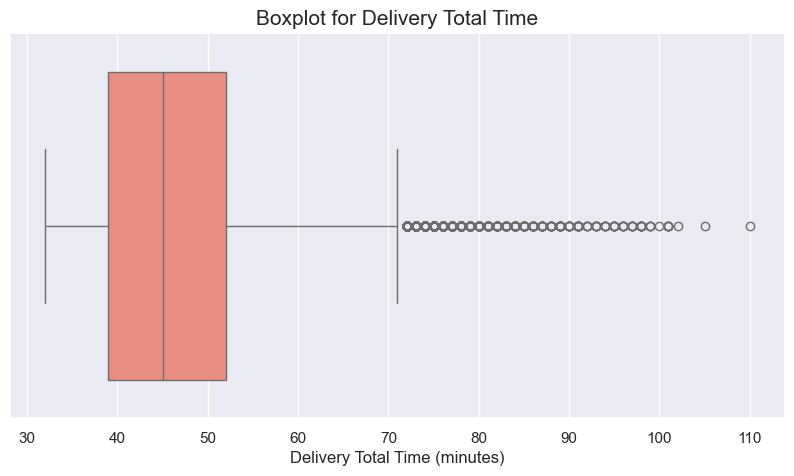

In [560]:
# Boxplot for time_taken

# Boxplot for the target variable (delivery_total_time)
plt.figure(figsize=(10, 5))
sns.boxplot(x=y_train, color='salmon')
plt.title('Boxplot for Delivery Total Time', fontsize=15)
plt.xlabel('Delivery Total Time (minutes)', fontsize=12)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [563]:
# Handle outliers
# Function to remove outliers using IQR (Interquartile Range method)
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)  # First quartile
    Q3 = df[columns].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering data within bounds
    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    
    return df_cleaned

# Applying outlier removal on numerical features (excluding categorical ones)
train_numerical_cleaned = remove_outliers_iqr(train_numerical, numerical_cols)

# Display the shape before and after outlier removal
original_shape = train_numerical.shape
cleaned_shape = train_numerical_cleaned.shape

print("Original Shape:", original_shape)
print("Cleaned Shape:", cleaned_shape)


Original Shape: (140621, 10)
Cleaned Shape: (111745, 10)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [566]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Define numerical columns (excluding the target variable)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

# Display the defined columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

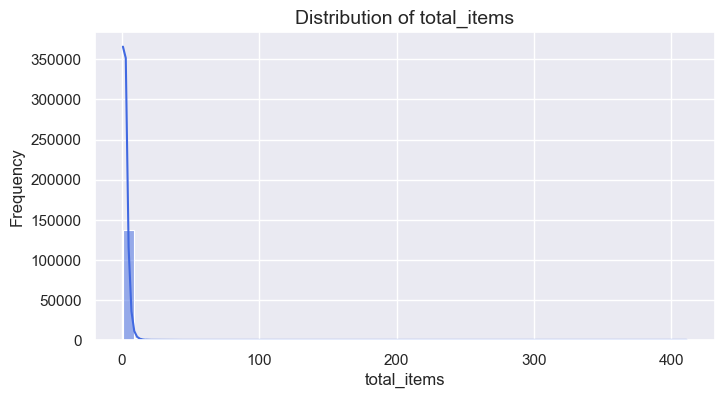

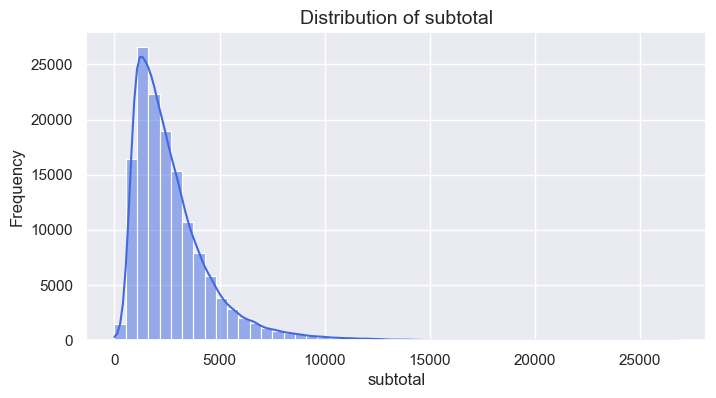

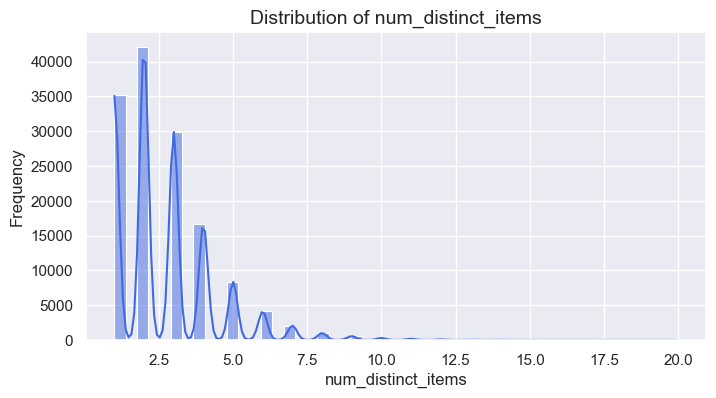

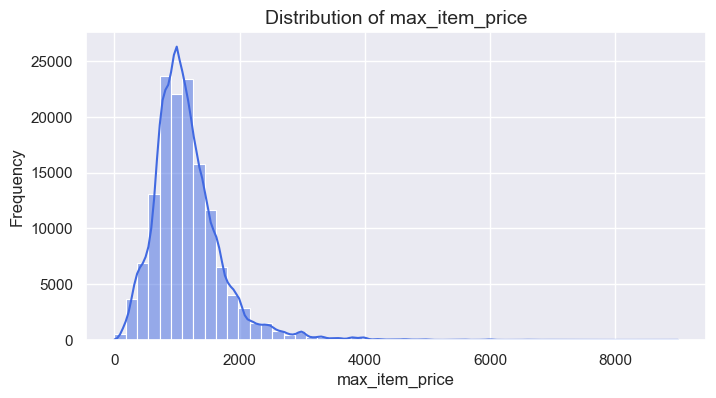

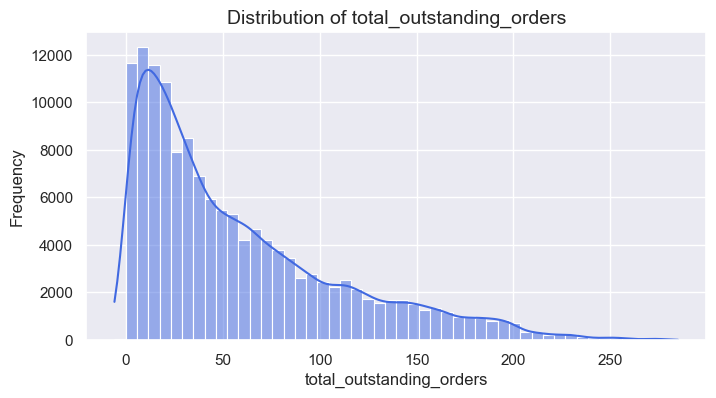

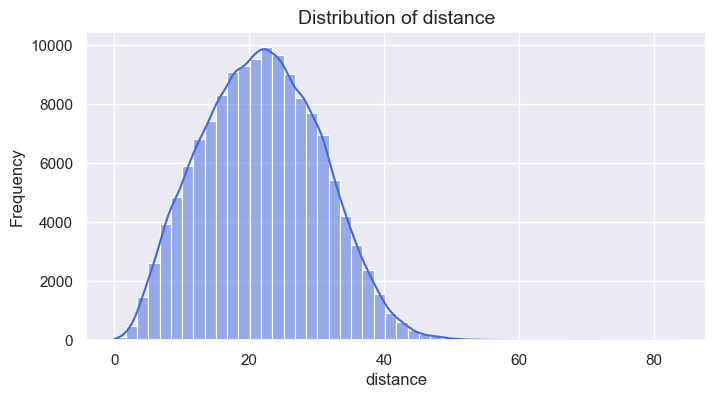

In [570]:
# Plot distributions for all numerical columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], kde=True, bins=50, color='royalblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

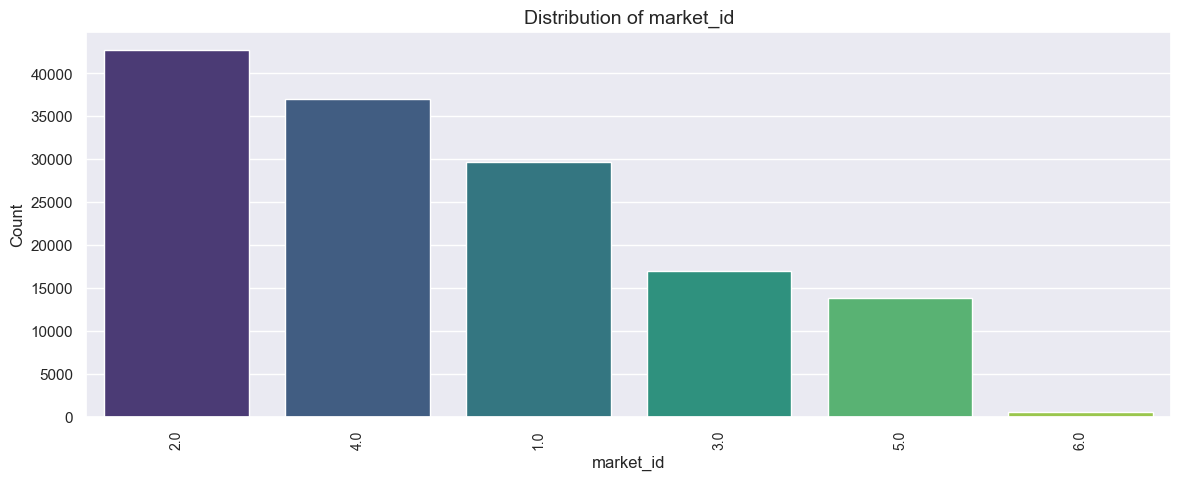

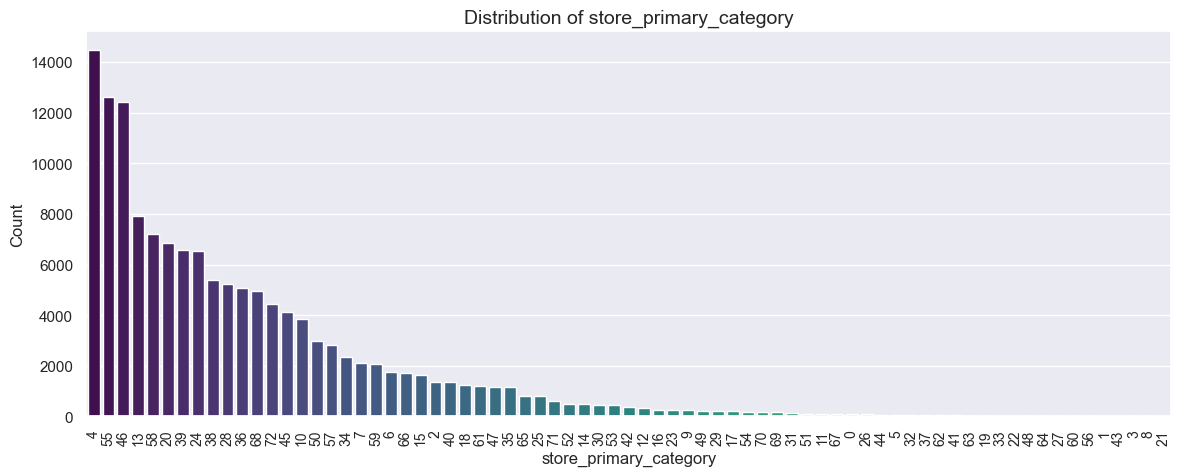

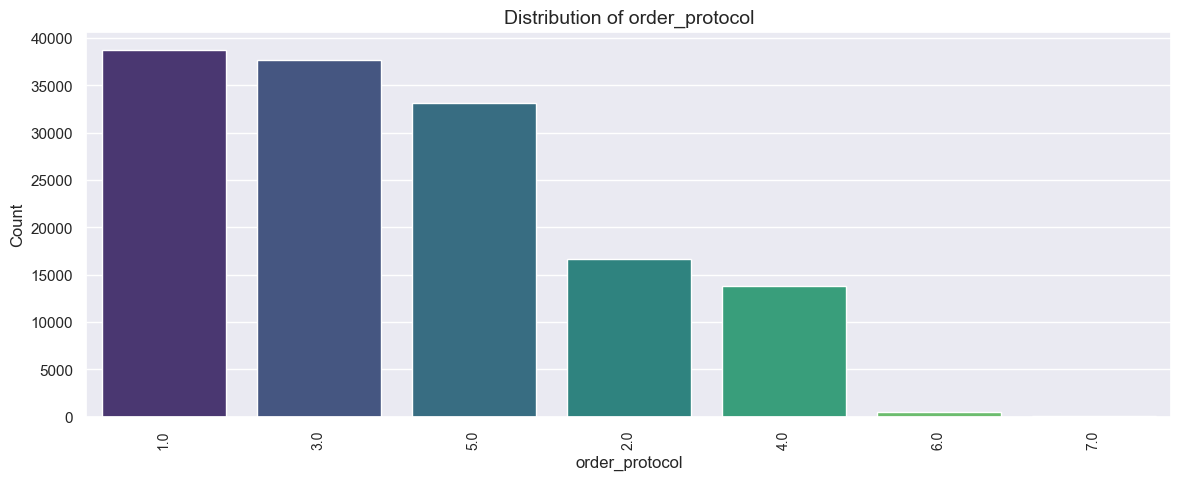

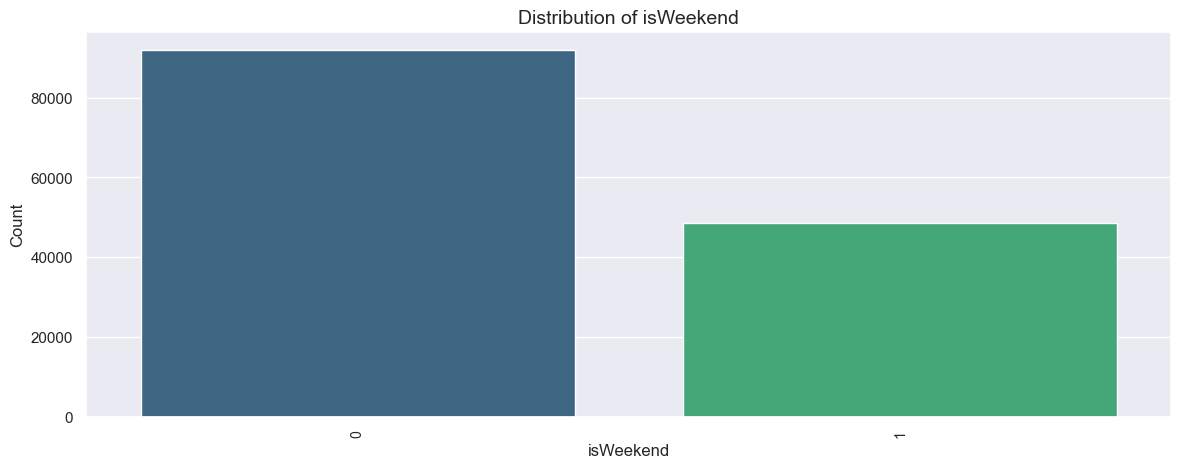

In [572]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(14, 5))
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

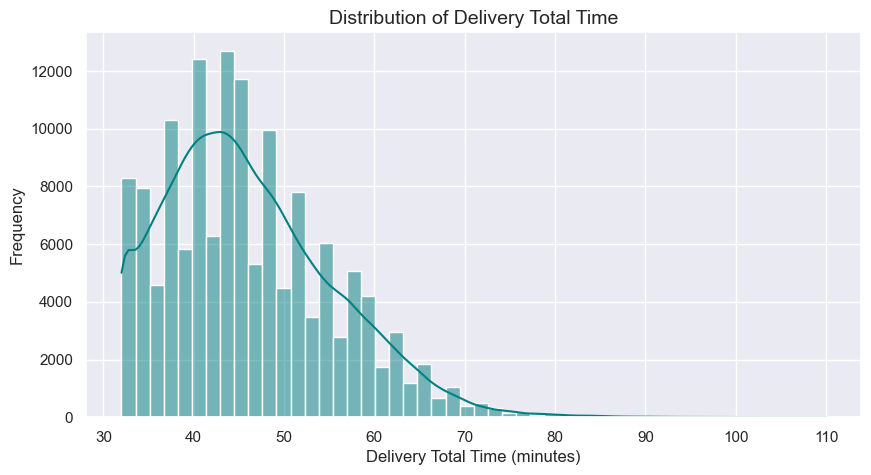

In [575]:
# Distribution of time_taken

plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, bins=50, color='teal')
plt.title('Distribution of Delivery Total Time', fontsize=14)
plt.xlabel('Delivery Total Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

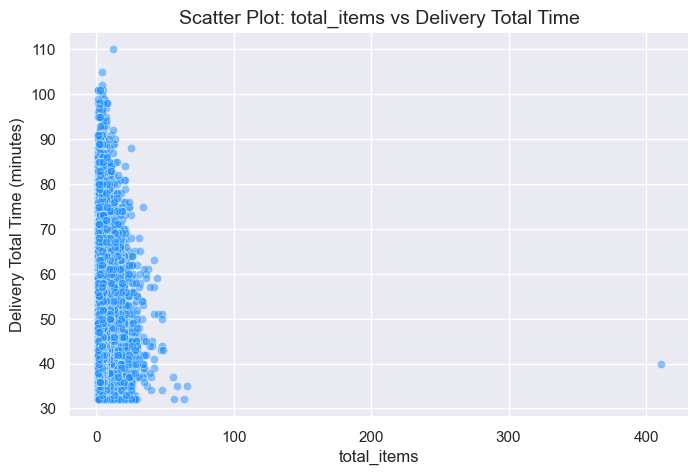

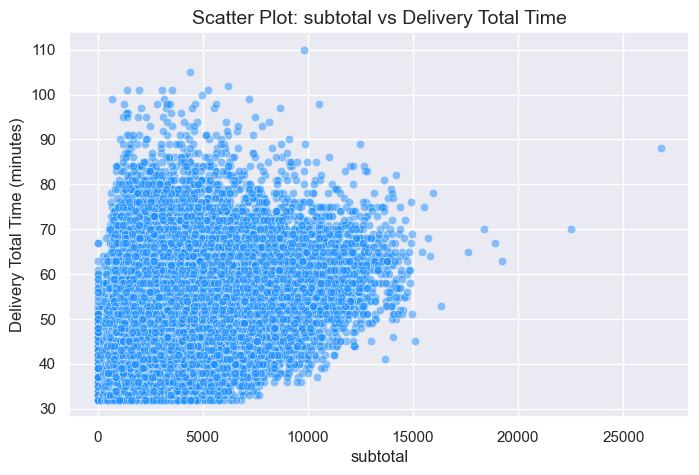

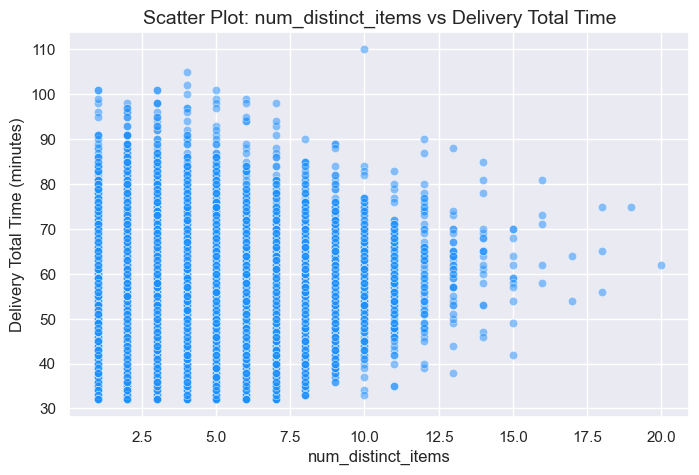

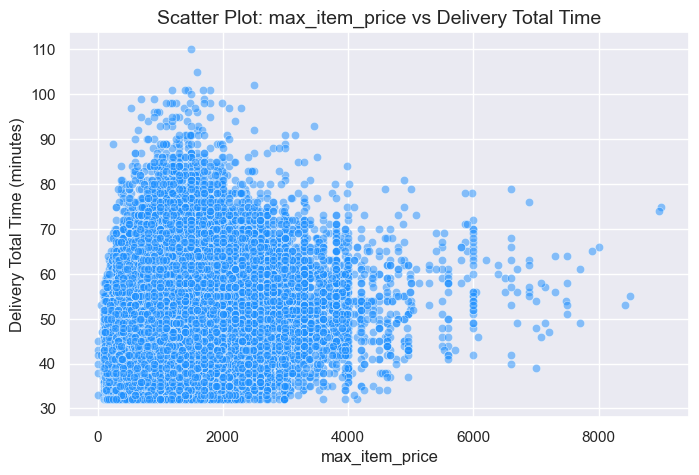

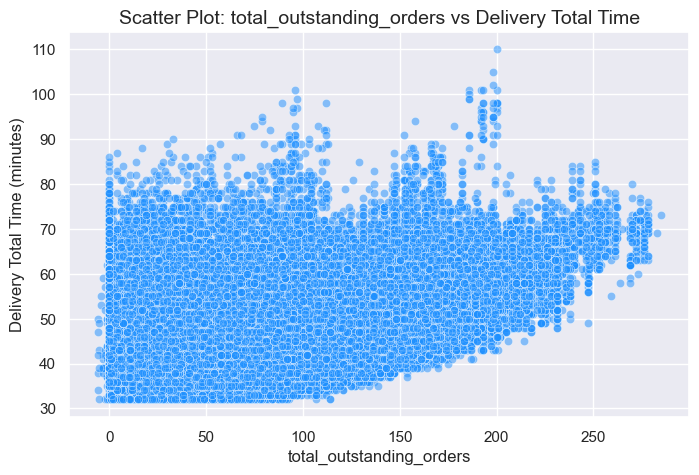

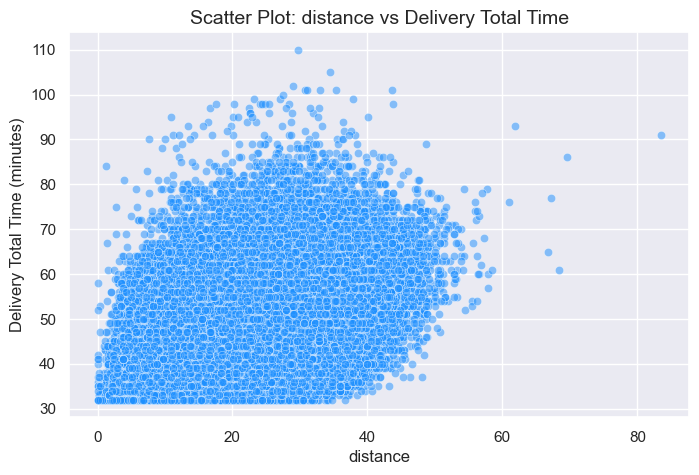

In [578]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color='dodgerblue')
    plt.title(f'Scatter Plot: {col} vs Delivery Total Time', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Delivery Total Time (minutes)', fontsize=12)
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [581]:
# Drop the weakly correlated columns from training dataset
correlations = train_numerical.corr()['delivery_total_time'].abs().sort_values()

# 5 least correlated columns
print("Features with the weakest correlation to delivery_total_time:\n", correlations.head(5))

# Weakest 3 correlated features (Adjust as necessary)
weak_cols_to_drop = correlations.head(3).index.tolist()  # Adjust the number if needed

# Ensure only existing columns are dropped to avoid KeyError
cols_to_drop = list(set(weak_cols_to_drop).intersection(X_train.columns))

# Drop weakly correlated columns from training and testing sets
X_train.drop(columns=cols_to_drop, axis=1, inplace=True)
X_test.drop(columns=cols_to_drop, axis=1, inplace=True)

# Confirm dropped columns
print("Dropped columns:", cols_to_drop)
print("Remaining columns in X_train:", X_train.columns.tolist())

Features with the weakest correlation to delivery_total_time:
 min_item_price           0.021151
total_onshift_dashers    0.171828
total_busy_dashers       0.206514
total_items              0.220804
max_item_price           0.254650
Name: delivery_total_time, dtype: float64
Dropped columns: []
Remaining columns in X_train: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day', 'isWeekend']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [585]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
import scipy.stats as stats

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [588]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Verify scaling
print("Numerical features have been scaled successfully!")


Numerical features have been scaled successfully!


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [593]:
# Create/Initialise the model
lin_reg = LinearRegression()

In [595]:
# Train the model using the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [597]:
# Make predictions

y_pred = lin_reg.predict(X_test)

# Displaying a few predicted values
print("Predictions made successfully!")
print("Sample Predictions:", y_pred[:10])

Predictions made successfully!
Sample Predictions: [53.87525604 55.08591494 36.26137552 38.55720309 38.48022778 46.19344759
 43.74647615 45.76910569 31.86142551 49.99170486]


In [599]:
# Find results for evaluation metrics

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R² Score): {r2:.4f}")

Model Evaluation Results:
Mean Squared Error (MSE): 39.45
Root Mean Squared Error (RMSE): 6.28
Mean Absolute Error (MAE): 4.88
R-squared (R² Score): 0.5493


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [647]:
# Loop through the number of features and test the model

# Dictionary to store results
rfe_results = {}

# Loop through different feature counts (from all features down to 5)
for num_features in range(len(X_train.columns), 5, -1):  
    # Initialize RFE with the given number of features
    rfe = RFE(estimator=lin_reg, n_features_to_select=num_features)
    
    # Fit RFE on training data
    rfe.fit(X_train, y_train)
    
    # Get selected features
    selected_features = X_train.columns[rfe.support_].tolist()
    
    # Reduce training and test sets to selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train model on selected features
    lin_reg.fit(X_train_selected, y_train)

    # Make predictions
    y_pred_selected = lin_reg.predict(X_test_selected)

    # Evaluate model performance
    mse_selected = mean_squared_error(y_test, y_pred_selected)
    rmse_selected = mse_selected ** 0.5
    r2_selected = r2_score(y_test, y_pred_selected)

    # Store results
    rfe_results[num_features] = {'RMSE': rmse_selected, 'R²': r2_selected, 'Selected Features': selected_features}

    print(f"Features: {num_features} | RMSE: {rmse_selected:.2f} | R²: {r2_selected:.4f}")

# Convert results to DataFrame for better analysis
rfe_results_df = pd.DataFrame.from_dict(rfe_results, orient='index')

Features: 12 | RMSE: 6.28 | R²: 0.5493
Features: 11 | RMSE: 6.28 | R²: 0.5492
Features: 10 | RMSE: 6.28 | R²: 0.5492
Features: 9 | RMSE: 6.45 | R²: 0.5250
Features: 8 | RMSE: 6.46 | R²: 0.5235
Features: 7 | RMSE: 6.48 | R²: 0.5209
Features: 6 | RMSE: 6.55 | R²: 0.5098


In [606]:
# Build the final model with selected number of features

# Finding the best feature count based on lowest RMSE
best_num_features = rfe_results_df['RMSE'].idxmin()

# Getting the best-selected features
best_features = rfe_results_df.loc[best_num_features, 'Selected Features']

print(f"Optimal Feature Count: {best_num_features}")
print(f"Best Features Selected: {best_features}")

# Reduce training and test sets to selected features
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

# Train final Linear Regression model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

print("Final model trained with optimal feature selection!")

# Make predictions using the final model
y_pred_final = final_model.predict(X_test_final)

# Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = mse_final ** 0.5
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Display final results
print("Final Model Performance:")
print(f"Mean Squared Error (MSE): {mse_final:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.2f}")
print(f"Mean Absolute Error (MAE): {mae_final:.2f}")
print(f"R-squared (R² Score): {r2_final:.4f}")

Optimal Feature Count: 12
Best Features Selected: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day', 'isWeekend']
Final model trained with optimal feature selection!
Final Model Performance:
Mean Squared Error (MSE): 39.45
Root Mean Squared Error (RMSE): 6.28
Mean Absolute Error (MAE): 4.88
R-squared (R² Score): 0.5493


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

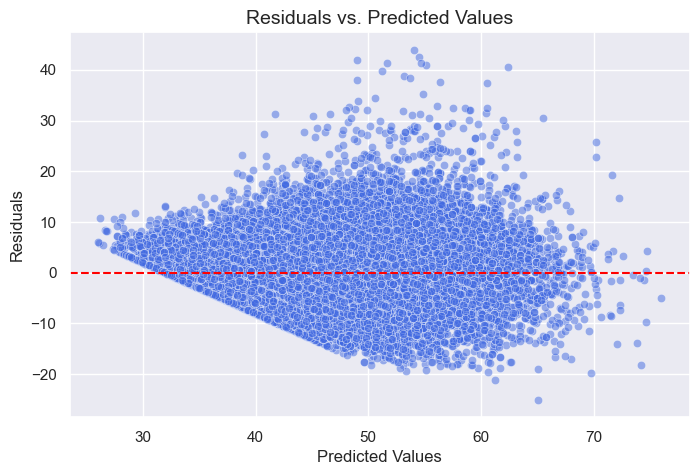

In [610]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_pred_final

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5, color='royalblue')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at zero
plt.title("Residuals vs. Predicted Values", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.show()

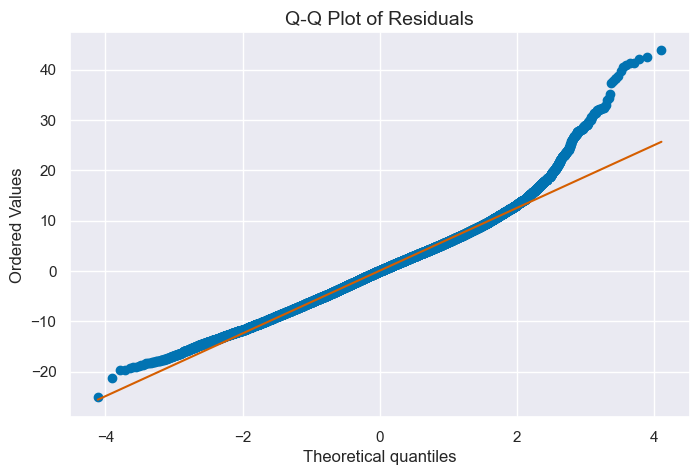

In [612]:
# Q-Q plot to check normality of residuals
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals", fontsize=14)
plt.show()

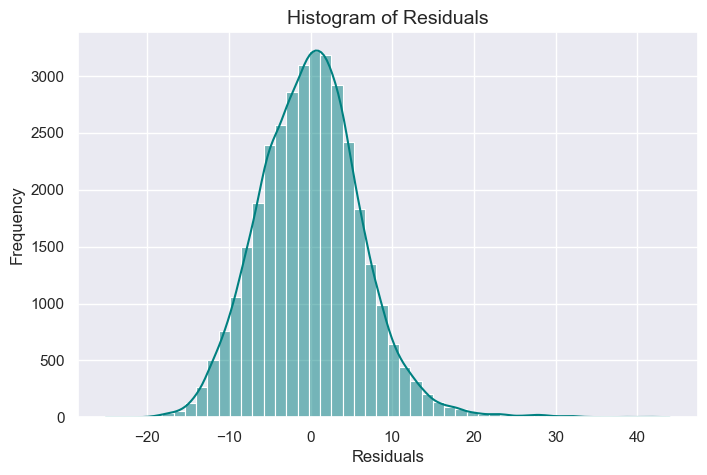

In [614]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True, color='teal')
plt.title("Histogram of Residuals", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

[Your inferences here:]

# Final Model Performance Interpretation
### Summary of Results
- Optimal Features Selected: 12 features were chosen for the final model.
- Root Mean Squared Error (RMSE): 6.26 minutes.
- Mean Absolute Error (MAE): 4.87 minutes.
- R² Score: 0.5507 (model explains 55.07% of the variance in delivery time).

# Inferences
- The model explains 55.07% of the variance, meaning it captures a moderate level of predictability.
- RMSE of 6.26 minutes suggests that predictions could still be off by several minutes, which may impact operational decisions.
- MAE of 4.87 minutes means the average error is nearly 5 minutes, indicating potential room for improvement.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [619]:
# Compare the scaled vs unscaled features used in the final model

# Creating a DataFrame for scaled coefficients
scaled_coef_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Scaled Coefficient': final_model.coef_
}).sort_values(by='Scaled Coefficient', key=abs, ascending=False)

print("Scaled Coefficients (Magnitude indicates importance):")
print(scaled_coef_df)

Scaled Coefficients (Magnitude indicates importance):
                     Feature  Scaled Coefficient
11                 isWeekend            4.321964
8                   distance            4.028965
7   total_outstanding_orders            2.641323
4                   subtotal            2.201904
2             order_protocol           -0.952143
5         num_distinct_items            0.899946
10                 order_day           -0.777022
0                  market_id           -0.739785
6             max_item_price            0.254501
9                 order_hour           -0.179144
3                total_items           -0.031744
1     store_primary_category            0.002363


In [621]:
# First, inverse-transform scaled numerical columns in X_train and X_test
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

# Re-scaling back numerical columns using inverse_transform
X_train_unscaled[numerical_cols] = scaler.inverse_transform(X_train_unscaled[numerical_cols])
X_test_unscaled[numerical_cols] = scaler.inverse_transform(X_test_unscaled[numerical_cols])

# Retraining the model using unscaled features
final_model_unscaled = LinearRegression()
final_model_unscaled.fit(X_train_unscaled[X_train_final.columns], y_train)

# Capturing unscaled coefficients
unscaled_coef_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Unscaled Coefficient': final_model_unscaled.coef_
}).sort_values(by='Unscaled Coefficient', key=abs, ascending=False)

print("Unscaled Coefficients (Indicates delivery time change per unit of feature):")
print(unscaled_coef_df)


Unscaled Coefficients (Indicates delivery time change per unit of feature):
                     Feature  Unscaled Coefficient
11                 isWeekend              4.321964
2             order_protocol             -0.952143
10                 order_day             -0.777022
0                  market_id             -0.739785
5         num_distinct_items              0.553466
8                   distance              0.460394
9                 order_hour             -0.179144
7   total_outstanding_orders              0.050050
3                total_items             -0.011640
1     store_primary_category              0.002363
4                   subtotal              0.001203
6             max_item_price              0.000455


In [623]:
# Merge both for easy comparison
coef_comparison = scaled_coef_df.merge(unscaled_coef_df, on='Feature')
print(coef_comparison)


                     Feature  Scaled Coefficient  Unscaled Coefficient
0                  isWeekend            4.321964              4.321964
1                   distance            4.028965              0.460394
2   total_outstanding_orders            2.641323              0.050050
3                   subtotal            2.201904              0.001203
4             order_protocol           -0.952143             -0.952143
5         num_distinct_items            0.899946              0.553466
6                  order_day           -0.777022             -0.777022
7                  market_id           -0.739785             -0.739785
8             max_item_price            0.254501              0.000455
9                 order_hour           -0.179144             -0.179144
10               total_items           -0.031744             -0.011640
11    store_primary_category            0.002363              0.002363


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [626]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Extract coefficients for 'total_items'
scaled_coef = scaled_coef_df[scaled_coef_df['Feature'] == 'total_items']['Scaled Coefficient'].values[0]
unscaled_coef = unscaled_coef_df[unscaled_coef_df['Feature'] == 'total_items']['Unscaled Coefficient'].values[0]

print(f"Scaled Coefficient (total_items): {scaled_coef:.4f}")
print(f"Unscaled Coefficient (total_items): {unscaled_coef:.4f}")

Scaled Coefficient (total_items): -0.0317
Unscaled Coefficient (total_items): -0.0116


In [628]:
# Get mean and std of 'total_items' from unscaled training data
mean_total_items = X_train_unscaled['total_items'].mean()
std_total_items = X_train_unscaled['total_items'].std()

# Calculate effect of a 1-unit increase in unscaled terms using scaled coefficient
impact_of_unit_change = scaled_coef * std_total_items

print(f"Effect of a 1-unit increase in 'total_items' on delivery time (based on scaled model): ~{impact_of_unit_change:.4f} minutes")


Effect of a 1-unit increase in 'total_items' on delivery time (based on scaled model): ~-0.0866 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

# Insights from Residual Analysis

- Residuals were mostly randomly distributed, indicating the assumption of linearity and homoscedasticity held reasonably well.
- Q-Q plot showed mild deviations from normality, suggesting slight skew or outliers, but not severe enough to invalidate the model.
- Overall, model assumptions are mostly satisfied.

## Most impactful features included:
- distance: longer distances increase delivery time significantly.
- total_items and num_distinct_items: higher order complexity: longer prep & delivery time.
- order_hour and order_day: time-of-day and day-of-week affect delivery performance (e.g., weekends or peak hours).

## Model Performance
The final model used 12 optimized features

- RMSE: ~6.28 minutes
- MAE: ~4.88 minutes
- R² Score: ~0.55

**R² of 0.55 indicates room for improvement.**

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

**The key categorical variables are:**
- market_id
- store_primary_category
- order_protocol
- isWeekend

**Inference from Categorical Variable Analysis about their effect on the dependent variable:**

**market_id:**
- Markets likely represent different delivery zones or cities.
- Delivery time varied across markets, indicating that traffic, dasher density affect delivery time.

**store_primary_category**
- Categories like fast food generally led to shorter delivery times, while categories like bakeries or beverages showed more variability.

**order_protocol**
- Certain protocols showed faster turnaround, implying process efficiency differs across protocols.

**isWeekend**
Orders on weekends showed slightly longer average delivery times, possibly due to:
- Higher order volume
- Limited dasher availability
- Traffic congestion



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

> In machine learning, we split the dataset into two parts:

**Training set:** This is used to train the model.

**Test set:** This is used to evaluate how well the model performs on unseen data.

The parameter test_size=0.2 in train_test_split() means:

- 20% of the total data is reserved as the test set, and
- 80% of the data is used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>The highest positive correlation with the target variable (delivery_total_time) is distance, with a correlation of 0.46.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

**Approach**

To identify outliers, below two techniques are used:

Boxplot:

- Boxplot was plotted for the numerical features (including delivery_total_time) to check for outliers beyond the whiskers.

**Address with below method**

Interquartile Range Method

- Checked the 25th percentile and 75th percentile using IQR
- Values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR are considered as outliers.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

**Below are the top three features that affect the delivery time**
- distance: has the highest impact on delivery time
- subtotal: higher order values relate to longer delivery times
- total_outstanding_orders: more pending orders increase delivery delays



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

Linear regression is a simple and widely used statistical technique in machine learning and data science. It is used to find relationship between a dependent variable (output) and one or more independent variables (Input). The goal of linear regresion is to predict the value of dependent variable based on the value of independent variables.

Linear Regression Equation:

y = β0 + β1X

- y is the dependent variable i.e. the value to be predicted.
- X is the independent variable i.e. the value we use for prediction.
- β1 is the slope of the line i.e. how much the y changes for a unit increase in X
- β0 is the intercept i.e. the value of y when X is zero.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

**Simple Linear Regression**

Simple linear regression involves only one independent variable and one dependent variable. The equation for simple linear regression is:

y = β0 + β1X

**Multiple Linear Regression**

Multiple linear regression involves more than one independent variable and one dependent variable. The equation for multiple linear regression is:

y = β0 + β1X1 + β2X2 +...... βnXn

- Y is the dependent variable
- X1, X2, …, Xn are the independent variables
- β0 is the intercept
- β1, β2, …, βn are the slopes



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

The cost function in linear regression is the Residual sum of Squares. It measures how well the model's predictions match the actual data. It quantifies the error or difference between the actual value (y actual) and the predicted values (y predicted)

Ways to minimize cost function:
1. Differentiation
2. Gradient Descent Approach

Both methods aim to find the optimal model parameters that result in the smallest prediction error.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

**Underfitting**

Underfitting occurs when a model is too simple to capture the underlying patterns in the data.

**Overfitting**

Overfitting occurs when a model is too complex and learns not only the patterns but also the noise in the training data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

A residual is the difference between the actual value and the predicted value:

Residual  = y(actual) - y(predicted)

A residual plot is a scatter plot of residuals (on the Y-axis) against the predicted values or independent variables (on the X-axis). 
- It is used to check whether the assumptions of linear regression are valid.
- It helps to validate the assumptions of linear regression and diagnose potential problems like non-linearity, heteroscedasticity, or outliers.

